In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_california_housing
import pandas as pd

#1  : 사이킷런 linearRegression 활용하기 

housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['PRICE'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


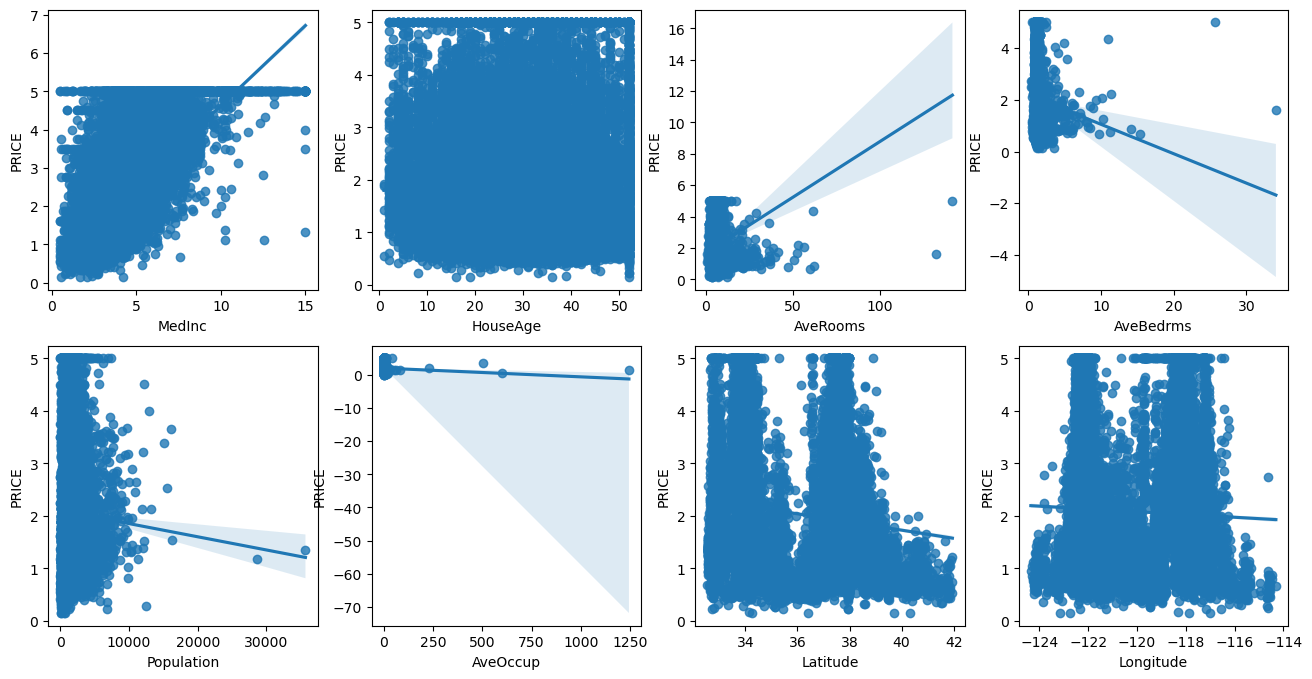

In [7]:
#2 시각화
fig , axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)

lm_features = housing.feature_names

for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature,y='PRICE',data=housing_df,ax = axs[row][col])

In [10]:
# 3 모델 학습 및 평가 - train/ test분리
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = housing_df['PRICE']
X_data = housing_df.drop(['PRICE'], axis=1)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3, random_state=156)

#학습 / 예측 / 평가
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_pred)))

MSE : 0.543, RMSE : 0.737
Variance score : 0.595


In [12]:
#4 회귀 계수 확인 및 정렬
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

# 피처별 회귀 계수 매핑 및 정렬
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
print(coeff.sort_values(ascending=False))

절편 값: -37.23905305294169
회귀 계수값: [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]
AveBedrms     0.6
MedInc        0.4
HouseAge      0.0
Population   -0.0
AveOccup     -0.0
AveRooms     -0.1
Latitude     -0.4
Longitude    -0.4
dtype: float64


In [15]:
# 5 교차검증 
from sklearn.model_selection import cross_val_score
# 다시 데이터 설정
y_target = housing_df['PRICE']
X_data = housing_df.drop(['PRICE'], axis=1)
lr = LinearRegression()

# 5 폴드 세트로 MSE 구하기 (사이킷런은 큰 값이 좋다고 판단하므로 MSE에 -를 붙인 값을 반환함)
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-0.48 -0.62 -0.65 -0.54 -0.49]
5 folds의 개별 RMSE scores :  [0.7  0.79 0.8  0.74 0.7 ]
5 folds의 평균 RMSE : 0.746


In [17]:
# PolynomialFeatures를 이용해 단항값을 2차 다항값으로 변환
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print('1차 단항식 계수 피처 : \n',X)

# 2차로 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)

print('2차 다항식 계수 피처 : \n',poly_ftr)

1차 단항식 계수 피처 : 
 [[0 1]
 [2 3]]
2차 다항식 계수 피처 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [19]:
# 다항값 + 선형회귀 -> 다항회귀 
# 컴퓨터가 얼마나 잘 맞히는지 테스트하려면,  미리 비밀 공식을 하나 정해놔야함
# 우리가 정한 비밀 공식: y = 1 + 2x1 + 3x1^2 + 4x2^3
def polynomial_func(X):
    # X[:, 0]은 첫 번째 열(x1), X[:, 1]은 두 번째 열(x2)
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y
    
# 정답(y) 계산
y = polynomial_func(X)
print('3차 다항식 정답값(y):\n', y) 

3차 다항식 정답값(y):
 [  5 125]


In [20]:
# 3차 다항 회귀 학습 
from sklearn.linear_model import LinearRegression

# 1. 데이터를 3차 다항식으로 뻥튀기 (10개 피처로 변신)
poly_ftr_3 = PolynomialFeatures(degree=3).fit_transform(X)

# 2. 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(poly_ftr_3, y)

# 3. 컴퓨터가 찾은 계수(w) 출력
print('모델이 찾은 계수:\n', np.round(model.coef_, 2))

모델이 찾은 계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [21]:
# 위 과정을 파이프라인으로 한 번에
from sklearn.pipeline import Pipeline

# Pipeline: 데이터를 넣으면 (1)다항변환 -> (2)회귀학습을 순서대로 자동 진행

model = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),  # 1번 통로: 다항 변환
    ('linear', LinearRegression())           # 2번 통로: 선형 회귀
])

# 학습 (X만 넣어도 내부에서 알아서 poly로 변환해서 학습함)
model.fit(X, y)

# 결과 확인 (파이프라인 안의 'linear' 단계의 계수를 꺼내옴)
print('Pipeline을 통한 회귀 계수:\n', np.round(model.named_steps['linear'].coef_, 2))

Pipeline을 통한 회귀 계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [24]:
# 릿지회귀
from sklearn.linear_model import Ridge
# 데이터 로드
housing = fetch_california_housing()
X_data = pd.DataFrame(housing.data, columns=housing.feature_names)
y_target = housing.target

# 릿지회귀
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge,X_data,y_target,scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(neg_mse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-0.484 -0.623 -0.646 -0.544 -0.494]
5 folds의 개별 RMSE scores :  [0.695 0.789 0.804 0.737 0.703]
5 folds의 평균 RMSE : -0.558


In [28]:
# alpha 값의 변화에 따른 평균 rmse 구하기 -  릿지 : 계수들의 제곱합을 억제하는 거 , 회귀계수 0 XXXXX 
alphas = [0,0.1,1,10,100]

for alpha in alphas :
    ridge = Ridge(alpha=alpha)

    #교차 검증으로 평균 rmse 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.5f}'.format(alpha, avg_rmse))


alpha 0 일 때 5 folds의 평균 RMSE : 0.74591
alpha 0.1 일 때 5 folds의 평균 RMSE : 0.74591
alpha 1 일 때 5 folds의 평균 RMSE : 0.74590
alpha 10 일 때 5 folds의 평균 RMSE : 0.74582
alpha 100 일 때 5 folds의 평균 RMSE : 0.74556


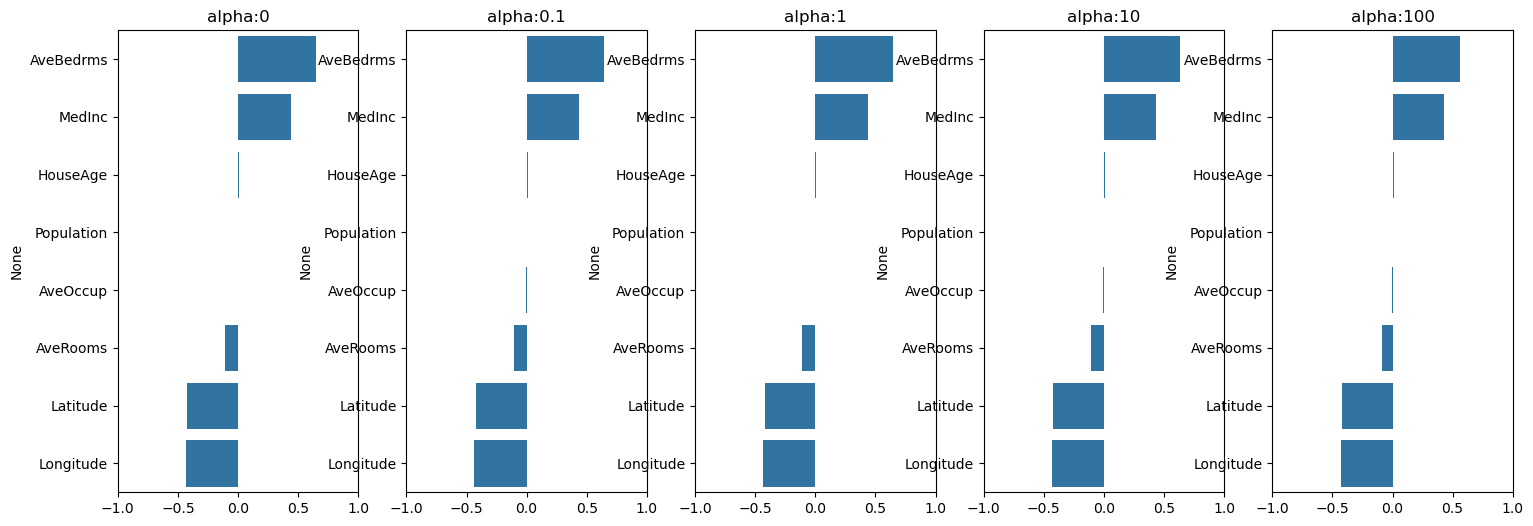

In [30]:
# alpha 변화에 따른 회귀 계수 시각화

# 시각화를 위한 subplot 생성 (1행 5열)
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    
    # 계수를 Series로 변환 후 저장
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    
    # 시각화 (막대 그래프)
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-1, 1) # 캘리포니아 데이터에 맞춰 범위 조정
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

In [33]:
sort_column = 'alpha:' + str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
AveBedrms,0.645066,0.644965,0.644062,0.635174,0.558249
MedInc,0.436693,0.436683,0.436594,0.435719,0.428210
HouseAge,0.009436,0.009436,0.009437,0.009452,0.009592
Population,-0.000004,-0.000004,-0.000004,-0.000004,-0.000003
AveOccup,-0.003787,-0.003787,-0.003786,-0.003785,-0.003773
AveRooms,-0.107322,-0.107303,-0.107133,-0.105456,-0.091012
Latitude,-0.421314,-0.421313,-0.421299,-0.421156,-0.419061
Longitude,-0.434514,-0.434511,-0.434485,-0.434217,-0.430993


In [60]:
#라쏘 회귀 : W의 절댓값에 페널티 
from sklearn.linear_model import Lasso, Ridge, ElasticNet
# 모델 , 알파값 , x,y,중간과
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True,return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose: print('####### ', model_name, ' #######')
    
    for param in params:
        # 1. 모델 선택
        if model_name == 'Ridge': model = Ridge(alpha=param) # param : 규제 강도 
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        # 2. 교차 검증 (RMSE 계산)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print(f'alpha {param}일 때 5 폴드 세트의 평균 RMSE: {avg_rmse:.3f}')
        
        # 3. 회귀 계수 저장 (시각화 및 비교용) - 회귀 계수(기울기) 추출 
        model.fit(X_data_n, y_target_n)
        coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
        colname = 'alpha:' + str(param)
        coeff_df[colname] = coeff
        
    return coeff_df

In [52]:
# 라쏘에 사용할 alpha 값들
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso  #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 0.784
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.813
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.873
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1.000
alpha 3일 때 5 폴드 세트의 평균 RMSE: 1.171


In [53]:
colname = 'alpha:' + str(lasso_alphas[0]) # 첫번째 열(0.07)일 때의 계수값이 큰 순서대로 
coeff_lasso_df.sort_values(by=colname, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
MedInc,0.387057,0.390583,0.288855,0.145469,0.000000
HouseAge,0.013391,0.015082,0.012031,0.005815,0.000000
Population,0.000010,0.000018,0.000012,-0.000006,-0.000023
AveRooms,-0.000000,-0.000000,0.000000,0.000000,0.000000
AveBedrms,0.000000,0.000000,-0.000000,-0.000000,-0.000000
AveOccup,-0.003409,-0.003323,-0.000000,-0.000000,-0.000000
Longitude,-0.204689,-0.099225,-0.000000,-0.000000,-0.000000
Latitude,-0.212806,-0.114214,-0.000000,-0.000000,-0.000000


In [47]:
# 엘라스틱넷 실험 (l1_ratio는 0.7로 고정)
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet  #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 0.773
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.788
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.855
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.931
alpha 3일 때 5 폴드 세트의 평균 RMSE: 1.171


In [54]:
colname = 'alpha:' + str(elastic_alphas[0]) # 첫번째 열(0.07)일 때의 계수값이 큰 순서대로 
coeff_elastic_df.sort_values(by=colname, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
MedInc,0.384500,0.385980,0.318532,0.213455,0.000000
HouseAge,0.012534,0.013697,0.013662,0.009156,0.000000
Population,0.000007,0.000012,0.000018,0.000003,-0.000023
AveRooms,0.000000,-0.000000,0.000000,0.000000,0.000000
AveBedrms,0.000000,0.000000,-0.000000,-0.000000,-0.000000
AveOccup,-0.003502,-0.003437,-0.000837,-0.000000,-0.000000
Longitude,-0.259559,-0.185737,-0.000000,-0.000000,-0.000000
Latitude,-0.264115,-0.195109,-0.000000,-0.000000,-0.000000


In [70]:
# 선형 회귀의 성능 극대화 -> 데이터 변환 
#why ? 선형 모델은 보통 정규 분포일 때 성능이 가장 좋음
# sol ) log , standard minmax ... / p_degree는 보통 2차까지 다항식 , nplog1p() -> 0 있으면 에러나니까 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import numpy as np

# 1. 데이터 변환 함수 정의
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(np.abs(input_data))
    else:
        scaled_data = input_data


# 다항 특성 추가 (Standard나 MinMax 후에 주로 적용)
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,include_bias=False).fit_transform(scaled_data)
        
    return scaled_data


In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=False):
    if verbose: print('####### ', model_name, ' #######')
    
    for param in params:
        # 모델 설정
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        # 교차 검증 (RMSE)
        # 데이터가 Numpy 배열이어도 cross_val_score는 아주 잘 돌아갑니다.
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, 
                                         scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        
        print(f'alpha {param}일 때 5 폴드 세트의 평균 RMSE: {avg_rmse:.3f}')

    # 이번 실습에선 성적만 출력하고 종료 (계수 반환 X)
    return None

In [71]:
alphas = [0.1, 1, 10, 100]
scale_methods = [
    (None, None), ('Standard', None), ('Standard', 2), 
    ('MinMax', None), ('MinMax', 2), ('Log', None)
]

for method, degree in scale_methods:
    X_data_scaled = get_scaled_data(method=method, p_degree=degree, input_data=X_data)
    print(f'\n## 변환 유형: {method}, Polynomial Degree: {degree}')
    
    # 수정된 함수 호출 (성적만 출력)
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)


## 변환 유형: None, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.746
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.746
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.746
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.746

## 변환 유형: Standard, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.746
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.746
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.746
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.746

## 변환 유형: Standard, Polynomial Degree: 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 3.323
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2.850
alpha 10일 때 5 폴드 세트의 평균 RMSE: 1.314
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.719

## 변환 유형: MinMax, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.745
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.748
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.754
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.816

## 변환 유형: MinMax, Polynomial Degree: 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.726
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.742
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.755
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.789

## 변환 유형: Log, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)

bike_df = pd.read_csv('train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# 문자열을 datetime 타입으로 변환하는 apply 
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df['year']=bike_df.datetime.apply(lambda x: x.year)
bike_df['month']=bike_df.datetime.apply(lambda x: x.month)
bike_df['day']=bike_df.datetime.apply(lambda x: x.day)
bike_df['hour']=bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [6]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns , axis = 1, inplace=True)

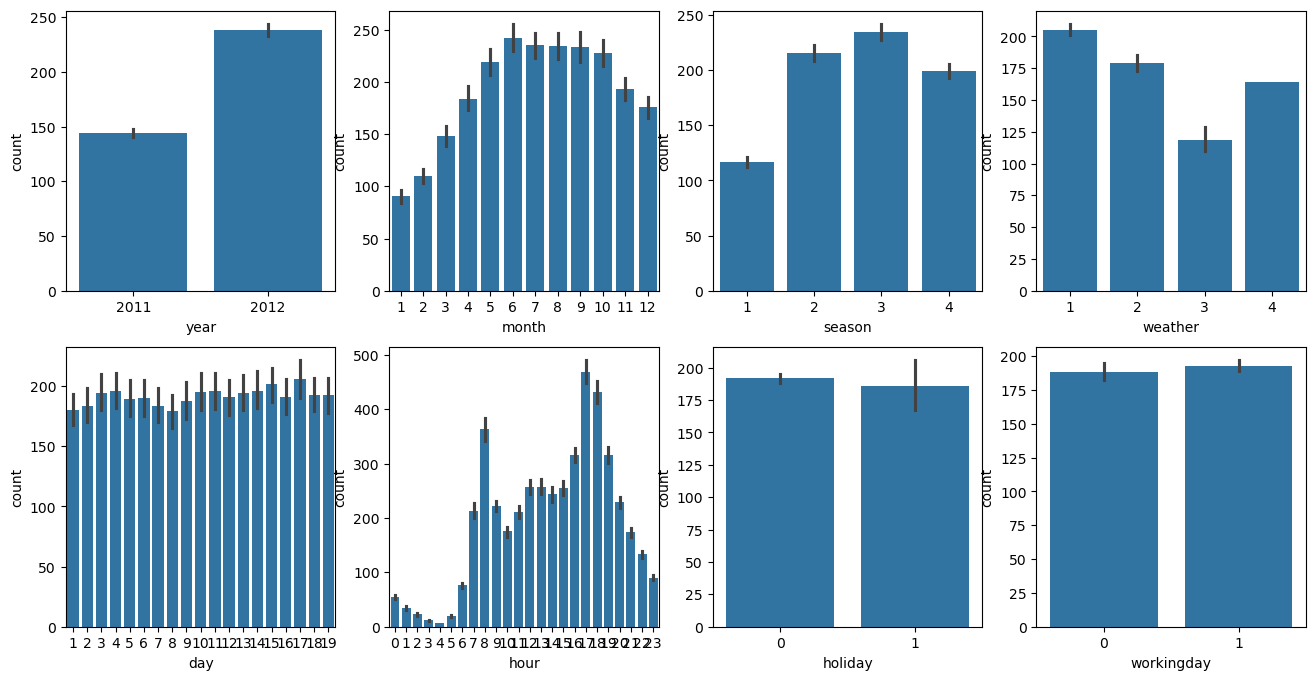

In [7]:
fig , axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
cat_features =['year','month','season','weather','day','hour','holiday','workingday']

for i , feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    sns.barplot(x=feature,y='count',data=bike_df,ax=axs[row][col])

In [28]:
# RMSLE 
from sklearn.metrics import mean_squared_error , mean_absolute_error

#log 값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p()를 이용해 rmsle 계산
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

#사이킷 런의 mean_square_error()를 이용해 rmse 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

#MAE , RMSE , RMSLE 를 모두 계싼
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    #MAE는 사이킷런의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y,pred)
    print('rmsle:{0:.3f},rmse:{1:.3F},mae:{2:.3F}'.format(rmsle_val,rmse_val,mae_val))

In [29]:
# 정규분포 , 원-핫 인코딩 확인
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso 

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_features,y_target,test_size=0.3,random_state=0)

lr_reg = LinearRegression() # 선형 회귀라는 모델(기계)을 생성
lr_reg.fit(X_train,y_train) # 학습용 데이터로 기계를 공부시킴(fit)
pred = lr_reg.predict(X_test) # 공부 안 한 테스트 데이터로 문제 풀기(predict) 
evaluate_regr(y_test,pred) # 아까 만든 함수로 점수(MAE, RMSE 등) 확인


rmsle:1.165,rmse:140.900,mae:105.924


In [30]:
#가장 크게 틀린 데이터 5개만 고
def get_top_error_data(y_test,pred,n_tops=5):
    # 1. 실제 정답과 예측값을 나란히 표(DataFrame)로 만듭니다.
    result_df = pd.DataFrame(y_test.values ,columns=['real_count'])
    result_df['predicted_count']=np.round(pred)

    # 2. '차이(diff)' 컬럼을 만듭니다. (절댓값 사용)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

    # 3. 차이가 큰 순서대로(ascending=False) 정렬해서 상위 n개만 출력합니다.
    print(result_df.sort_values('diff',ascending=False)[:n_tops])

get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


In [31]:
y_log_transform=np.log1p(y_target)

#타킷 칼럼인 count값을 1og1p로 로그 변환
y_target_log = np.log1p(y_target)

#로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
X_train,X_test,y_train,y_test = train_test_split(X_features,y_target_log,test_size=0.3,random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train) 
pred = lr_reg.predict(X_test) 

#테스트 데이터 세트의 target값은 로그 변환 됐으므로 다시 expm1을 이용해 원래 스케일로 변환 
y_test_exp = np.expm1(y_test)
#예측값도 로그 변환된 타킷 기반으로 학습돼 예측됐으므로 다시 expm1로 스케일 변환
pred_exp = np.expm1(pred)

#원래 단위로 오차계산
evaluate_regr(y_test_exp,pred_exp)

rmsle:1.017,rmse:162.594,mae:109.286


<Axes: ylabel='None'>

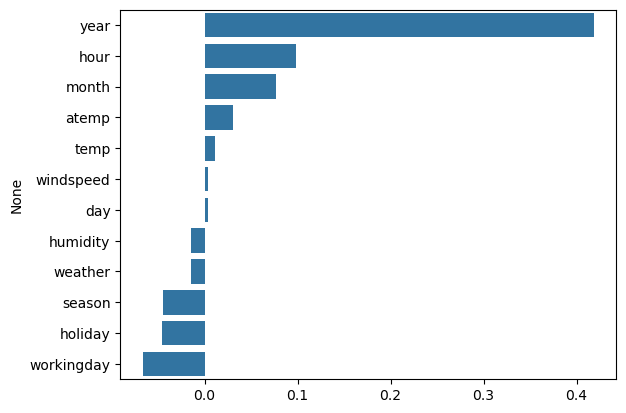

In [32]:
# 피처들의 회귀 계숫값 시각화 
coef = pd.Series(lr_reg.coef_,index=X_features.columns) # lr_reg.coef_ 회귀계수 
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values,y=coef_sort.index)

In [33]:
# 판다스의 get_dummies()를 이용해 원-핫 인코딩 하기
X_features_ohe = pd.get_dummies(X_features,columns=['year','hour','month','day','holiday','workingday','season','weather'])

In [34]:
#원-핫 인코딩 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할 
X_train,X_test,y_train,y_test = train_test_split(X_features_ohe,y_target_log,test_size=0.3,random_state=0)

In [37]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    # 모델 학습
    model.fit(X_train, y_train)
    # 예측 수행
    pred = model.predict(X_test)
    
    # 만약 로그 변환된 타겟을 학습했다면, 다시 원래 스케일로 복구
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    
    # 모델 이름 출력 (예: LinearRegression)
    print('###', model.__class__.__name__, '###')
    # 이전에 만든 평가 함수 호출
    evaluate_regr(y_test, pred)

# 모델 생성 (릿지와 라쏘는 규제 강도 alpha 설정)
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

# 반복문을 돌며 모델별로 학습/예측/평가 한꺼번에 수행
for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
rmsle:0.590,rmse:97.688,mae:63.382
### Ridge ###
rmsle:0.590,rmse:98.529,mae:63.893
### Lasso ###
rmsle:0.635,rmse:113.219,mae:72.803


<Axes: ylabel='None'>

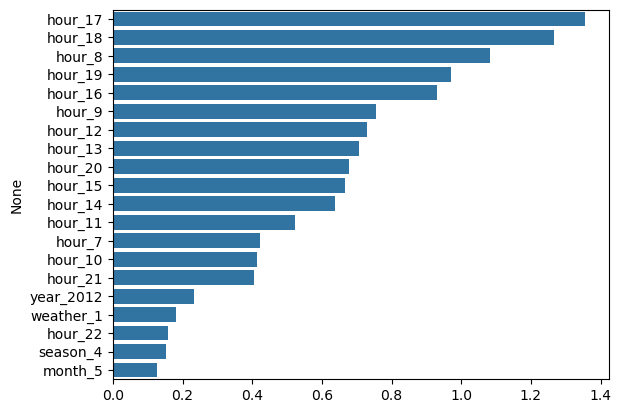

In [39]:
coef = pd.Series(lr_reg.coef_,index=X_features_ohe.columns)
coef_sort=coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values,y=coef_sort.index)

In [42]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 모델 객체 생성 (n_estimators=500은 나무를 500그루 심겠다는 뜻!)
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500, verbose=-1) # verbose=-1은 불필요한 로그 생략

# 모델별로 루프를 돌며 평가 수행
for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost 등 일부 모델의 오류 방지를 위해 .values를 사용하여 넘파이 배열(ndarray)로 전달
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
rmsle:0.354,rmse:50.235,mae:31.167
### GradientBoostingRegressor ###
rmsle:0.330,rmse:53.335,mae:32.743
### XGBRegressor ###
rmsle:0.339,rmse:51.432,mae:31.341
### LGBMRegressor ###
rmsle:0.319,rmse:47.215,mae:29.029


C:\Users\default.DESKTOP-IB7ET6G\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
